In [1]:
import networkx as nx
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import time
from collections import Counter
%matplotlib inline 
from tqdm import tqdm

# parameters

alpha = 0.15
a = [1, 2, 4]

def read_folder() : # ok
    all_files = sorted(os.listdir(path = "/Users/danielchoy1314/Downloads/as-733"))
    # print(all_files)
    return all_files

def envolving_graph(file):    
    f = open(file)
    G = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)

    for i in range(4, n_lines) :
        line = f.readline()      
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        G.add_edge(a,b)

    f.close()
    return G

def current_graph(file) :
    f = open(file)
    r = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)

    for i in range(4, n_lines):
        line = f.readline()
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        r.add_edge(a, b)
        
    f.close()
    return r

def update_graph(graph, newnode) :
    G = graph
    E = list(G.edges())

    edge = random.choice(E)
    u = edge[0]
    v = edge[1]

    # change of head
    G.remove_edge(u,v)
    u = newnode
    G.add_edge(u, v)

    return G # new graph

def RoundRobin_probing(node_list, current_graph, count) :
    loopnode = -1
    while True :
        loopnode = node_list[count]
        count += 1
        if loopnode == node_list[-1] :
            count = 0
        if current_graph.has_node(loopnode):
            break

    return loopnode, count

def PowerIteration(graph) :
    V = list(graph.nodes())
    n = len(V)
    for i in range(len(V)):
        v = V[i]
        graph.nodes[v]["old_pi"] = 1/n
        graph.nodes[v]["new_pi"] = 1/n

    # power iterations
    iterations_count = 0
    while True:
        iterations_count += 1  # (pi(1)->pi(t))
        # iterate
        for i in range(len(V)):
            v = V[i]
            graph.nodes[v]["old_pi"] = graph.nodes[v]["new_pi"]
            graph.nodes[v]["new_pi"] = 0

        for i in range(len(V)):
            v = V[i]
            temp = 0
            for u in graph.neighbors(v):
                temp += graph.nodes[u]["old_pi"] / len(list(graph.neighbors(u)))
            graph.nodes[v]["new_pi"] = (1 - alpha) * temp + alpha / n

        # check convergence
        tol = 0
        for i in range(len(V)):
            v = V[i]
            tol += np.abs(graph.nodes[v]["old_pi"] - graph.nodes[v]["new_pi"])

        if tol < 1e-9:
            # print("convergence")
            break

    # set an attribute true pagerank pi to all nodes

    pagerank = {}
    for i in range(len(V)):
        v = V[i]
        pagerank[v] = graph.nodes[v]["new_pi"]
        graph.nodes[v]["real.pi"] = graph.nodes[v]["new_pi"]

    return pagerank

def L_error(true_pi, estimated_pi) :
    # L1 = sum of (estimated_pi - true_pi) at any time step t
    # Linfinity = max error of pagerank
    
    list = []
    for key in true_pi:
        if key not in list:
            list.append(key)

    for key in estimated_pi:
        if key not in list:
            list.append(key)
     
    check= len(set(list)) == len(list)
    
    if(check) : # whether all distinct node
        print("True")
    else :
        print("false")
        
    # print(true_pi[list[1]])
    # print(estimated_pi[list[1]])
    # print(list[1])
    # print(len(list))    
    result = np.zeros(len(list))

    # print(estimated_pi(list[1]))
    # print(len(list))
    
    count = 0
    for i in range(len(list)) :
        if((list[i] in estimated_pi) and (list[i] in true_pi )) :
            result[i] = abs((estimated_pi[list[i]])-(true_pi[list[i]]))          
        elif ((list[i] in estimated_pi) and (list[i] not in true_pi)) :
            result[i] = estimated_pi[list[i]]            
        else :
            result[i] = true_pi[list[i]] 
        count+=result[i]
        
    # print(count)
    # print(max(result))
    return count , max(result)


In [2]:
list_of_file = read_folder()

for i in range(len(list_of_file)) :
    list_of_file[i] = "/Users/danielchoy1314/Downloads/as-733/" + list_of_file[i]  
    
# print(len(list_of_file))

G = envolving_graph(list_of_file[0])
# print(len(list(G.edges())))
node_list = list(G.nodes())
count = 0
K = 1 # recomputing frequency 
changes = []
L1_metric = []
Linfinity_metric = []

for i in tqdm(range(1,len(list_of_file)),desc="Loading…", ascii=False, ncols=75) :
    g = current_graph(list_of_file[i])
    true_pi = PowerIteration(g) 
#______________________________________________________________________#
    for j in range(K) :
        node, count= RoundRobin_probing(node_list, g, count)
        G = update_graph(G, node)        
    changes.append(K)
    K+=1
    estimated_pi = PowerIteration(G)
    
    L1_error, Linfinity_error = L_error(true_pi, estimated_pi)
    L1_metric.append(L1_error)
    Linfinity_metric.append(Linfinity_error)

    
print("Complete")


Loading…:   0%|                          | 1/732 [00:05<1:10:30,  5.79s/it]

True


Loading…:   0%|                          | 2/732 [00:12<1:12:08,  5.93s/it]

True


Loading…:   0%|                          | 3/732 [00:18<1:13:15,  6.03s/it]

True


Loading…:   1%|▏                         | 4/732 [00:24<1:13:59,  6.10s/it]

True


Loading…:   1%|▏                         | 5/732 [00:29<1:10:13,  5.80s/it]

True


Loading…:   1%|▏                         | 6/732 [00:36<1:13:59,  6.11s/it]

True


Loading…:   1%|▏                         | 7/732 [00:43<1:17:10,  6.39s/it]

True


Loading…:   1%|▎                         | 8/732 [00:51<1:24:01,  6.96s/it]

True


Loading…:   1%|▎                         | 9/732 [00:59<1:27:33,  7.27s/it]

True


Loading…:   1%|▎                        | 10/732 [01:07<1:29:06,  7.40s/it]

True


Loading…:   2%|▍                        | 11/732 [01:14<1:26:07,  7.17s/it]

True


Loading…:   2%|▍                        | 12/732 [01:20<1:21:17,  6.77s/it]

True


Loading…:   2%|▍                        | 13/732 [01:26<1:20:37,  6.73s/it]

True


Loading…:   2%|▍                        | 14/732 [01:32<1:17:16,  6.46s/it]

True


Loading…:   2%|▌                        | 15/732 [01:38<1:14:36,  6.24s/it]

True


Loading…:   2%|▌                        | 16/732 [01:43<1:12:06,  6.04s/it]

True


Loading…:   2%|▌                        | 17/732 [01:49<1:10:47,  5.94s/it]

True


Loading…:   2%|▌                        | 18/732 [01:55<1:09:20,  5.83s/it]

True


Loading…:   3%|▋                        | 19/732 [02:00<1:08:33,  5.77s/it]

True


Loading…:   3%|▋                        | 20/732 [02:06<1:07:55,  5.72s/it]

True


Loading…:   3%|▋                        | 21/732 [02:12<1:07:46,  5.72s/it]

True


Loading…:   3%|▊                        | 22/732 [02:17<1:07:57,  5.74s/it]

True


Loading…:   3%|▊                        | 23/732 [02:24<1:10:01,  5.93s/it]

True


Loading…:   3%|▊                        | 24/732 [02:30<1:10:36,  5.98s/it]

True


Loading…:   3%|▊                        | 25/732 [02:35<1:09:32,  5.90s/it]

True


Loading…:   4%|▉                        | 26/732 [02:41<1:08:45,  5.84s/it]

True


Loading…:   4%|▉                        | 27/732 [02:47<1:08:09,  5.80s/it]

True


Loading…:   4%|▉                        | 28/732 [02:53<1:08:14,  5.82s/it]

True


Loading…:   4%|▉                        | 29/732 [02:58<1:07:50,  5.79s/it]

True


Loading…:   4%|█                        | 30/732 [03:05<1:09:58,  5.98s/it]

True


Loading…:   4%|█                        | 31/732 [03:11<1:09:07,  5.92s/it]

True


Loading…:   4%|█                        | 32/732 [03:16<1:08:16,  5.85s/it]

True


Loading…:   5%|█▏                       | 33/732 [03:22<1:07:43,  5.81s/it]

True


Loading…:   5%|█▏                       | 34/732 [03:29<1:09:51,  6.00s/it]

True


Loading…:   5%|█▏                       | 35/732 [03:35<1:11:21,  6.14s/it]

True


Loading…:   5%|█▏                       | 36/732 [03:41<1:10:48,  6.10s/it]

True


Loading…:   5%|█▎                       | 37/732 [03:46<1:08:07,  5.88s/it]

True


Loading…:   5%|█▎                       | 38/732 [03:52<1:06:15,  5.73s/it]

True


Loading…:   5%|█▎                       | 39/732 [03:57<1:04:57,  5.62s/it]

True


Loading…:   5%|█▎                       | 40/732 [04:03<1:04:11,  5.57s/it]

True


Loading…:   6%|█▍                       | 41/732 [04:08<1:03:34,  5.52s/it]

True


Loading…:   6%|█▍                       | 42/732 [04:13<1:02:35,  5.44s/it]

True


Loading…:   6%|█▍                       | 43/732 [04:19<1:02:14,  5.42s/it]

True


Loading…:   6%|█▌                       | 44/732 [04:24<1:02:18,  5.43s/it]

True


Loading…:   6%|█▌                       | 45/732 [04:30<1:04:58,  5.68s/it]

True


Loading…:   6%|█▌                       | 46/732 [04:36<1:05:59,  5.77s/it]

True


Loading…:   6%|█▌                       | 47/732 [04:42<1:05:02,  5.70s/it]

True


Loading…:   7%|█▋                       | 48/732 [04:48<1:06:46,  5.86s/it]

True


Loading…:   7%|█▋                       | 49/732 [04:53<1:04:42,  5.68s/it]

True


Loading…:   7%|█▋                       | 50/732 [04:59<1:03:20,  5.57s/it]

True


Loading…:   7%|█▋                       | 51/732 [05:04<1:02:12,  5.48s/it]

True


Loading…:   7%|█▊                       | 52/732 [05:09<1:01:24,  5.42s/it]

True


Loading…:   7%|█▊                       | 53/732 [05:14<1:00:15,  5.33s/it]

True


Loading…:   7%|█▉                         | 54/732 [05:19<59:39,  5.28s/it]

True


Loading…:   8%|█▉                       | 55/732 [05:25<1:00:51,  5.39s/it]

True


Loading…:   8%|█▉                       | 56/732 [05:31<1:02:39,  5.56s/it]

True


Loading…:   8%|█▉                       | 57/732 [05:36<1:01:11,  5.44s/it]

True


Loading…:   8%|██▏                        | 58/732 [05:41<58:44,  5.23s/it]

True


Loading…:   8%|██▏                        | 59/732 [05:46<57:08,  5.09s/it]

True


Loading…:   8%|██▏                        | 60/732 [05:51<55:55,  4.99s/it]

True


Loading…:   8%|██▎                        | 61/732 [05:55<54:55,  4.91s/it]

True


Loading…:   8%|██▎                        | 62/732 [06:00<54:20,  4.87s/it]

True


Loading…:   9%|██▎                        | 63/732 [06:05<55:01,  4.93s/it]

True


Loading…:   9%|██▎                        | 64/732 [06:10<54:13,  4.87s/it]

True


Loading…:   9%|██▍                        | 65/732 [06:14<53:27,  4.81s/it]

True


Loading…:   9%|██▍                        | 66/732 [06:19<52:51,  4.76s/it]

True


Loading…:   9%|██▍                        | 67/732 [06:24<52:41,  4.75s/it]

True


Loading…:   9%|██▌                        | 68/732 [06:29<52:41,  4.76s/it]

True


Loading…:   9%|██▌                        | 69/732 [06:33<52:22,  4.74s/it]

True


Loading…:  10%|██▌                        | 70/732 [06:38<52:05,  4.72s/it]

True


Loading…:  10%|██▌                        | 71/732 [06:43<53:15,  4.83s/it]

True


Loading…:  10%|██▋                        | 72/732 [06:48<53:06,  4.83s/it]

True


Loading…:  10%|██▋                        | 73/732 [06:53<53:37,  4.88s/it]

True


Loading…:  10%|██▋                        | 74/732 [06:58<53:26,  4.87s/it]

True


Loading…:  10%|██▊                        | 75/732 [07:03<54:32,  4.98s/it]

True


Loading…:  10%|██▊                        | 76/732 [07:08<54:03,  4.94s/it]

True


Loading…:  11%|██▊                        | 77/732 [07:13<53:30,  4.90s/it]

True


Loading…:  11%|██▉                        | 78/732 [07:17<53:00,  4.86s/it]

True


Loading…:  11%|██▉                        | 79/732 [07:22<52:54,  4.86s/it]

True


Loading…:  11%|██▉                        | 80/732 [07:27<52:39,  4.85s/it]

True


Loading…:  11%|██▉                        | 81/732 [07:32<53:18,  4.91s/it]

True


Loading…:  11%|███                        | 82/732 [07:37<53:15,  4.92s/it]

True


Loading…:  11%|███                        | 83/732 [07:42<52:50,  4.89s/it]

True


Loading…:  11%|███                        | 84/732 [07:47<52:22,  4.85s/it]

True


Loading…:  12%|███▏                       | 85/732 [07:52<52:15,  4.85s/it]

True


Loading…:  12%|███▏                       | 86/732 [07:57<53:02,  4.93s/it]

True


Loading…:  12%|███▏                       | 87/732 [08:02<53:44,  5.00s/it]

True


Loading…:  12%|███▏                       | 88/732 [08:07<54:17,  5.06s/it]

True


Loading…:  12%|███▎                       | 89/732 [08:12<54:22,  5.07s/it]

True


Loading…:  12%|███▎                       | 90/732 [08:17<53:33,  5.01s/it]

True


Loading…:  12%|███▎                       | 91/732 [08:22<53:18,  4.99s/it]

True


Loading…:  13%|███▍                       | 92/732 [08:27<52:49,  4.95s/it]

True


Loading…:  13%|███▍                       | 93/732 [08:32<52:58,  4.97s/it]

True


Loading…:  13%|███▍                       | 94/732 [08:37<52:46,  4.96s/it]

True


Loading…:  13%|███▌                       | 95/732 [08:42<52:16,  4.92s/it]

True


Loading…:  13%|███▌                       | 96/732 [08:47<54:23,  5.13s/it]

True


Loading…:  13%|███▌                       | 97/732 [08:53<55:27,  5.24s/it]

True


Loading…:  13%|███▌                       | 98/732 [08:58<55:19,  5.24s/it]

True


Loading…:  14%|███▋                       | 99/732 [09:03<54:46,  5.19s/it]

True


Loading…:  14%|███▌                      | 100/732 [09:08<54:16,  5.15s/it]

True


Loading…:  14%|███▌                      | 101/732 [09:13<53:49,  5.12s/it]

True


Loading…:  14%|███▌                      | 102/732 [09:18<53:25,  5.09s/it]

True


Loading…:  14%|███▋                      | 103/732 [09:23<52:14,  4.98s/it]

True


Loading…:  14%|███▋                      | 104/732 [09:28<51:45,  4.95s/it]

True


Loading…:  14%|███▋                      | 105/732 [09:33<52:19,  5.01s/it]

True


Loading…:  14%|███▊                      | 106/732 [09:38<53:43,  5.15s/it]

True


Loading…:  15%|███▊                      | 107/732 [09:44<54:29,  5.23s/it]

True


Loading…:  15%|███▊                      | 108/732 [09:49<52:58,  5.09s/it]

True


Loading…:  15%|███▊                      | 109/732 [09:53<52:13,  5.03s/it]

True


Loading…:  15%|███▉                      | 110/732 [09:58<51:28,  4.96s/it]

True


Loading…:  15%|███▉                      | 111/732 [10:03<52:14,  5.05s/it]

True


Loading…:  15%|███▉                      | 112/732 [10:08<51:54,  5.02s/it]

True


Loading…:  15%|████                      | 113/732 [10:13<50:44,  4.92s/it]

True


Loading…:  16%|████                      | 114/732 [10:18<50:04,  4.86s/it]

True


Loading…:  16%|████                      | 115/732 [10:23<49:47,  4.84s/it]

True


Loading…:  16%|████                      | 116/732 [10:27<49:41,  4.84s/it]

True


Loading…:  16%|████▏                     | 117/732 [10:32<49:15,  4.81s/it]

True


Loading…:  16%|████▏                     | 118/732 [10:38<50:52,  4.97s/it]

True


Loading…:  16%|████▏                     | 119/732 [10:44<54:37,  5.35s/it]

True


Loading…:  16%|████▎                     | 120/732 [10:49<54:29,  5.34s/it]

True


Loading…:  17%|████▎                     | 121/732 [10:55<56:46,  5.57s/it]

True


Loading…:  17%|████▎                     | 122/732 [11:01<57:51,  5.69s/it]

True


Loading…:  17%|████▎                     | 123/732 [11:07<58:01,  5.72s/it]

True


Loading…:  17%|████                    | 124/732 [11:13<1:00:12,  5.94s/it]

True


Loading…:  17%|████▍                     | 125/732 [11:19<59:59,  5.93s/it]

True


Loading…:  17%|████▏                   | 126/732 [11:26<1:00:50,  6.02s/it]

True


Loading…:  17%|████▏                   | 127/732 [11:32<1:02:22,  6.19s/it]

True


Loading…:  17%|████▏                   | 128/732 [11:39<1:04:45,  6.43s/it]

True


Loading…:  18%|████▏                   | 129/732 [11:45<1:03:03,  6.28s/it]

True


Loading…:  18%|████▎                   | 130/732 [11:51<1:00:40,  6.05s/it]

True


Loading…:  18%|████▋                     | 131/732 [11:56<57:59,  5.79s/it]

True


Loading…:  18%|████▋                     | 132/732 [12:01<55:51,  5.59s/it]

True


Loading…:  18%|████▋                     | 133/732 [12:06<54:56,  5.50s/it]

True


Loading…:  18%|████▊                     | 134/732 [12:12<54:20,  5.45s/it]

True


Loading…:  18%|████▊                     | 135/732 [12:17<54:55,  5.52s/it]

True


Loading…:  19%|████▊                     | 136/732 [12:23<54:31,  5.49s/it]

True


Loading…:  19%|████▊                     | 137/732 [12:28<54:29,  5.49s/it]

True


Loading…:  19%|████▉                     | 138/732 [12:33<53:21,  5.39s/it]

True


Loading…:  19%|████▉                     | 139/732 [12:39<52:57,  5.36s/it]

True


Loading…:  19%|████▉                     | 140/732 [12:44<53:58,  5.47s/it]

True


Loading…:  19%|█████                     | 141/732 [12:51<56:06,  5.70s/it]

True


Loading…:  19%|█████                     | 142/732 [12:56<55:55,  5.69s/it]

True


Loading…:  20%|█████                     | 143/732 [13:02<56:35,  5.77s/it]

True


Loading…:  20%|█████                     | 144/732 [13:09<58:54,  6.01s/it]

True


Loading…:  20%|█████▏                    | 145/732 [13:15<59:01,  6.03s/it]

True


Loading…:  20%|█████▏                    | 146/732 [13:21<59:00,  6.04s/it]

True


Loading…:  20%|█████▏                    | 147/732 [13:27<58:12,  5.97s/it]

True


Loading…:  20%|█████▎                    | 148/732 [13:32<55:58,  5.75s/it]

True


Loading…:  20%|█████▎                    | 149/732 [13:38<56:47,  5.84s/it]

True


Loading…:  20%|█████▎                    | 150/732 [13:44<57:55,  5.97s/it]

True


Loading…:  21%|█████▎                    | 151/732 [13:51<59:36,  6.16s/it]

True


Loading…:  21%|████▉                   | 152/732 [13:57<1:00:27,  6.26s/it]

True


Loading…:  21%|█████                   | 153/732 [14:04<1:01:07,  6.33s/it]

True


Loading…:  21%|█████                   | 154/732 [14:10<1:00:57,  6.33s/it]

True


Loading…:  21%|█████                   | 155/732 [14:17<1:01:51,  6.43s/it]

True


Loading…:  21%|█████                   | 156/732 [14:23<1:00:53,  6.34s/it]

True


Loading…:  21%|█████▏                  | 157/732 [14:29<1:01:08,  6.38s/it]

True


Loading…:  22%|█████▏                  | 158/732 [14:36<1:02:28,  6.53s/it]

True


Loading…:  22%|█████▋                    | 159/732 [14:42<59:27,  6.23s/it]

True


Loading…:  22%|█████▋                    | 160/732 [14:48<59:25,  6.23s/it]

True


Loading…:  22%|█████▋                    | 161/732 [14:54<57:41,  6.06s/it]

True


Loading…:  22%|█████▊                    | 162/732 [15:00<58:51,  6.20s/it]

True


Loading…:  22%|█████▊                    | 163/732 [15:06<56:44,  5.98s/it]

True


Loading…:  22%|█████▊                    | 164/732 [15:12<56:43,  5.99s/it]

True


Loading…:  23%|█████▊                    | 165/732 [15:18<57:07,  6.04s/it]

True


Loading…:  23%|█████▉                    | 166/732 [15:24<57:34,  6.10s/it]

True


Loading…:  23%|█████▉                    | 167/732 [15:31<58:57,  6.26s/it]

True


Loading…:  23%|█████▌                  | 168/732 [15:38<1:00:25,  6.43s/it]

True


Loading…:  23%|█████▌                  | 169/732 [15:45<1:02:32,  6.67s/it]

True


Loading…:  23%|█████▌                  | 170/732 [15:51<1:02:01,  6.62s/it]

True


Loading…:  23%|█████▌                  | 171/732 [15:58<1:02:43,  6.71s/it]

True


Loading…:  23%|█████▋                  | 172/732 [16:05<1:01:36,  6.60s/it]

True


Loading…:  24%|██████▏                   | 173/732 [16:10<58:56,  6.33s/it]

True


Loading…:  24%|██████▏                   | 174/732 [16:16<56:27,  6.07s/it]

True


Loading…:  24%|██████▏                   | 175/732 [16:22<57:10,  6.16s/it]

True


Loading…:  24%|██████▎                   | 176/732 [16:28<55:23,  5.98s/it]

True


Loading…:  24%|██████▎                   | 177/732 [16:34<56:53,  6.15s/it]

True


Loading…:  24%|██████▎                   | 178/732 [16:41<57:29,  6.23s/it]

True


Loading…:  24%|██████▎                   | 179/732 [16:46<55:13,  5.99s/it]

True


Loading…:  25%|██████▍                   | 180/732 [16:53<56:24,  6.13s/it]

True


Loading…:  25%|██████▍                   | 181/732 [16:59<58:15,  6.34s/it]

True


Loading…:  25%|██████▍                   | 182/732 [17:06<58:31,  6.38s/it]

True


Loading…:  25%|██████▌                   | 183/732 [17:13<59:44,  6.53s/it]

True


Loading…:  25%|██████▌                   | 184/732 [17:19<59:44,  6.54s/it]

True


Loading…:  25%|██████▌                   | 185/732 [17:26<59:36,  6.54s/it]

True


Loading…:  25%|██████▌                   | 186/732 [17:32<58:45,  6.46s/it]

True


Loading…:  26%|██████▋                   | 187/732 [17:38<58:08,  6.40s/it]

True


Loading…:  26%|██████▋                   | 188/732 [17:45<57:36,  6.35s/it]

True


Loading…:  26%|██████▋                   | 189/732 [17:51<57:00,  6.30s/it]

True


Loading…:  26%|██████▋                   | 190/732 [17:56<55:16,  6.12s/it]

True


Loading…:  26%|██████▊                   | 191/732 [18:03<56:42,  6.29s/it]

True


Loading…:  26%|██████▊                   | 192/732 [18:10<57:29,  6.39s/it]

True


Loading…:  26%|██████▊                   | 193/732 [18:17<59:57,  6.67s/it]

True


Loading…:  27%|██████▎                 | 194/732 [18:24<1:00:09,  6.71s/it]

True


Loading…:  27%|██████▍                 | 195/732 [18:31<1:01:15,  6.84s/it]

True


Loading…:  27%|██████▍                 | 196/732 [18:38<1:01:55,  6.93s/it]

True


Loading…:  27%|██████▍                 | 197/732 [18:45<1:02:27,  7.00s/it]

True


Loading…:  27%|██████▍                 | 198/732 [18:52<1:02:30,  7.02s/it]

True


Loading…:  27%|██████▌                 | 199/732 [18:59<1:01:04,  6.88s/it]

True


Loading…:  27%|███████                   | 200/732 [19:05<58:05,  6.55s/it]

True


Loading…:  27%|███████▏                  | 201/732 [19:11<56:29,  6.38s/it]

True


Loading…:  28%|███████▏                  | 202/732 [19:16<53:53,  6.10s/it]

True


Loading…:  28%|███████▏                  | 203/732 [19:22<52:33,  5.96s/it]

True


Loading…:  28%|███████▏                  | 204/732 [19:29<54:52,  6.24s/it]

True


Loading…:  28%|███████▎                  | 205/732 [19:35<54:07,  6.16s/it]

True


Loading…:  28%|███████▎                  | 206/732 [19:41<53:53,  6.15s/it]

True


Loading…:  28%|███████▎                  | 207/732 [19:47<52:46,  6.03s/it]

True


Loading…:  28%|███████▍                  | 208/732 [19:52<51:24,  5.89s/it]

True


Loading…:  29%|███████▍                  | 209/732 [19:58<50:29,  5.79s/it]

True


Loading…:  29%|███████▍                  | 210/732 [20:03<49:09,  5.65s/it]

True


Loading…:  29%|███████▍                  | 211/732 [20:09<51:04,  5.88s/it]

True


Loading…:  29%|███████▌                  | 212/732 [20:16<52:52,  6.10s/it]

True


Loading…:  29%|███████▌                  | 213/732 [20:22<52:59,  6.13s/it]

True


Loading…:  29%|███████▌                  | 214/732 [20:28<52:08,  6.04s/it]

True


Loading…:  29%|███████▋                  | 215/732 [20:34<50:50,  5.90s/it]

True


Loading…:  30%|███████▋                  | 216/732 [20:39<50:07,  5.83s/it]

True


Loading…:  30%|███████▋                  | 217/732 [20:45<49:36,  5.78s/it]

True


Loading…:  30%|███████▋                  | 218/732 [20:51<48:53,  5.71s/it]

True


Loading…:  30%|███████▊                  | 219/732 [20:57<50:01,  5.85s/it]

True


Loading…:  30%|███████▊                  | 220/732 [21:03<50:35,  5.93s/it]

True


Loading…:  30%|███████▊                  | 221/732 [21:09<51:52,  6.09s/it]

True


Loading…:  30%|███████▉                  | 222/732 [21:17<54:45,  6.44s/it]

True


Loading…:  30%|███████▉                  | 223/732 [21:23<54:40,  6.45s/it]

True


Loading…:  31%|███████▉                  | 224/732 [21:30<55:21,  6.54s/it]

True


Loading…:  31%|███████▉                  | 225/732 [21:35<53:02,  6.28s/it]

True


Loading…:  31%|████████                  | 226/732 [21:41<51:03,  6.06s/it]

True


Loading…:  31%|████████                  | 227/732 [21:47<49:43,  5.91s/it]

True


Loading…:  31%|████████                  | 228/732 [21:53<50:02,  5.96s/it]

True


Loading…:  31%|████████▏                 | 229/732 [21:58<49:36,  5.92s/it]

True


Loading…:  31%|████████▏                 | 230/732 [22:04<48:30,  5.80s/it]

True


Loading…:  32%|████████▏                 | 231/732 [22:10<48:09,  5.77s/it]

True


Loading…:  32%|████████▏                 | 232/732 [22:16<48:31,  5.82s/it]

True


Loading…:  32%|████████▎                 | 233/732 [22:22<49:48,  5.99s/it]

True


Loading…:  32%|████████▎                 | 234/732 [22:28<49:19,  5.94s/it]

True


Loading…:  32%|████████▎                 | 235/732 [22:34<48:51,  5.90s/it]

True


Loading…:  32%|████████▍                 | 236/732 [22:40<50:01,  6.05s/it]

True


Loading…:  32%|████████▍                 | 237/732 [22:46<49:11,  5.96s/it]

True


Loading…:  33%|████████▍                 | 238/732 [22:52<48:52,  5.94s/it]

True


Loading…:  33%|████████▍                 | 239/732 [22:58<49:32,  6.03s/it]

True


Loading…:  33%|████████▌                 | 240/732 [23:04<48:36,  5.93s/it]

True


Loading…:  33%|████████▌                 | 241/732 [23:09<48:18,  5.90s/it]

True


Loading…:  33%|████████▌                 | 242/732 [23:15<48:19,  5.92s/it]

True


Loading…:  33%|████████▋                 | 243/732 [23:21<47:56,  5.88s/it]

True


Loading…:  33%|████████▋                 | 244/732 [23:27<48:11,  5.92s/it]

True


Loading…:  33%|████████▋                 | 245/732 [23:33<47:22,  5.84s/it]

True


Loading…:  34%|████████▋                 | 246/732 [23:39<47:11,  5.83s/it]

True


Loading…:  34%|████████▊                 | 247/732 [23:44<45:56,  5.68s/it]

True


Loading…:  34%|████████▊                 | 248/732 [23:50<45:46,  5.67s/it]

True


Loading…:  34%|████████▊                 | 249/732 [23:55<45:41,  5.68s/it]

True


Loading…:  34%|████████▉                 | 250/732 [24:01<46:30,  5.79s/it]

True


Loading…:  34%|████████▉                 | 251/732 [24:08<47:26,  5.92s/it]

True


Loading…:  34%|████████▉                 | 252/732 [24:14<47:54,  5.99s/it]

True


Loading…:  35%|████████▉                 | 253/732 [24:20<47:39,  5.97s/it]

True


Loading…:  35%|█████████                 | 254/732 [24:26<48:32,  6.09s/it]

True


Loading…:  35%|█████████                 | 255/732 [24:32<49:16,  6.20s/it]

True


Loading…:  35%|█████████                 | 256/732 [24:39<49:49,  6.28s/it]

True


Loading…:  35%|█████████▏                | 257/732 [24:45<49:19,  6.23s/it]

True


Loading…:  35%|█████████▏                | 258/732 [24:50<47:09,  5.97s/it]

True


Loading…:  35%|█████████▏                | 259/732 [24:56<45:32,  5.78s/it]

True


Loading…:  36%|█████████▏                | 260/732 [25:01<45:00,  5.72s/it]

True


Loading…:  36%|█████████▎                | 261/732 [25:07<44:57,  5.73s/it]

True


Loading…:  36%|█████████▎                | 262/732 [25:13<45:02,  5.75s/it]

True


Loading…:  36%|█████████▎                | 263/732 [25:19<44:49,  5.73s/it]

True


Loading…:  36%|█████████▍                | 264/732 [25:24<45:03,  5.78s/it]

True


Loading…:  36%|█████████▍                | 265/732 [25:30<45:21,  5.83s/it]

True


Loading…:  36%|█████████▍                | 266/732 [25:36<45:43,  5.89s/it]

True


Loading…:  36%|█████████▍                | 267/732 [25:42<45:10,  5.83s/it]

True


Loading…:  37%|█████████▌                | 268/732 [25:48<44:20,  5.73s/it]

True


Loading…:  37%|█████████▌                | 269/732 [25:54<46:50,  6.07s/it]

True


Loading…:  37%|█████████▌                | 270/732 [26:01<47:55,  6.22s/it]

True


Loading…:  37%|█████████▋                | 271/732 [26:08<48:20,  6.29s/it]

True


Loading…:  37%|█████████▋                | 272/732 [26:14<49:32,  6.46s/it]

True


Loading…:  37%|█████████▋                | 273/732 [26:21<50:34,  6.61s/it]

True


Loading…:  37%|█████████▋                | 274/732 [26:29<52:16,  6.85s/it]

True


Loading…:  38%|█████████▊                | 275/732 [26:36<52:35,  6.91s/it]

True


Loading…:  38%|█████████▊                | 276/732 [26:43<52:54,  6.96s/it]

True


Loading…:  38%|█████████▊                | 277/732 [26:48<49:36,  6.54s/it]

True


Loading…:  38%|█████████▊                | 278/732 [26:55<48:40,  6.43s/it]

True


Loading…:  38%|█████████▉                | 279/732 [27:01<47:56,  6.35s/it]

True


Loading…:  38%|█████████▉                | 280/732 [27:07<47:34,  6.32s/it]

True


Loading…:  38%|█████████▉                | 281/732 [27:12<45:32,  6.06s/it]

True


Loading…:  39%|██████████                | 282/732 [27:18<44:06,  5.88s/it]

True


Loading…:  39%|██████████                | 283/732 [27:24<43:21,  5.79s/it]

True


Loading…:  39%|██████████                | 284/732 [27:29<42:45,  5.73s/it]

True


Loading…:  39%|██████████                | 285/732 [27:35<42:13,  5.67s/it]

True


Loading…:  39%|██████████▏               | 286/732 [27:40<42:11,  5.68s/it]

True


Loading…:  39%|██████████▏               | 287/732 [27:46<41:17,  5.57s/it]

True


Loading…:  39%|██████████▏               | 288/732 [27:51<40:44,  5.51s/it]

True


Loading…:  39%|██████████▎               | 289/732 [27:56<40:15,  5.45s/it]

True


Loading…:  40%|██████████▎               | 290/732 [28:02<40:10,  5.45s/it]

True


Loading…:  40%|██████████▎               | 291/732 [28:07<40:15,  5.48s/it]

True


Loading…:  40%|██████████▎               | 292/732 [28:13<41:08,  5.61s/it]

True


Loading…:  40%|██████████▍               | 293/732 [28:20<43:52,  6.00s/it]

True


Loading…:  40%|██████████▍               | 294/732 [28:28<47:01,  6.44s/it]

True


Loading…:  40%|██████████▍               | 295/732 [28:34<46:23,  6.37s/it]

True


Loading…:  40%|██████████▌               | 296/732 [28:40<45:43,  6.29s/it]

True


Loading…:  41%|██████████▌               | 297/732 [28:46<44:57,  6.20s/it]

True


Loading…:  41%|██████████▌               | 298/732 [28:52<43:35,  6.03s/it]

True


Loading…:  41%|██████████▌               | 299/732 [28:57<42:16,  5.86s/it]

True


Loading…:  41%|██████████▋               | 300/732 [29:03<41:35,  5.78s/it]

True


Loading…:  41%|██████████▋               | 301/732 [29:08<41:38,  5.80s/it]

True


Loading…:  41%|██████████▋               | 302/732 [29:15<42:29,  5.93s/it]

True


Loading…:  41%|██████████▊               | 303/732 [29:21<43:47,  6.13s/it]

True


Loading…:  42%|██████████▊               | 304/732 [29:28<44:08,  6.19s/it]

True


Loading…:  42%|██████████▊               | 305/732 [29:34<43:27,  6.11s/it]

True


Loading…:  42%|██████████▊               | 306/732 [29:41<45:16,  6.38s/it]

True


Loading…:  42%|██████████▉               | 307/732 [29:48<46:51,  6.62s/it]

True


Loading…:  42%|██████████▉               | 308/732 [29:55<47:50,  6.77s/it]

True


Loading…:  42%|██████████▉               | 309/732 [30:02<49:22,  7.00s/it]

True


Loading…:  42%|███████████               | 310/732 [30:10<49:58,  7.11s/it]

True


Loading…:  42%|███████████               | 311/732 [30:17<50:02,  7.13s/it]

True


Loading…:  43%|███████████               | 312/732 [30:25<51:17,  7.33s/it]

True


Loading…:  43%|███████████               | 313/732 [30:31<49:08,  7.04s/it]

True


Loading…:  43%|███████████▏              | 314/732 [30:38<48:24,  6.95s/it]

True


Loading…:  43%|███████████▏              | 315/732 [30:44<45:55,  6.61s/it]

True


Loading…:  43%|███████████▏              | 316/732 [30:49<44:05,  6.36s/it]

True


Loading…:  43%|███████████▎              | 317/732 [30:55<43:00,  6.22s/it]

True


Loading…:  43%|███████████▎              | 318/732 [31:01<42:27,  6.15s/it]

True


Loading…:  44%|███████████▎              | 319/732 [31:07<42:08,  6.12s/it]

True


Loading…:  44%|███████████▎              | 320/732 [31:13<42:02,  6.12s/it]

True


Loading…:  44%|███████████▍              | 321/732 [31:19<41:33,  6.07s/it]

True


Loading…:  44%|███████████▍              | 322/732 [31:26<41:45,  6.11s/it]

True


Loading…:  44%|███████████▍              | 323/732 [31:31<40:42,  5.97s/it]

True


Loading…:  44%|███████████▌              | 324/732 [31:37<40:09,  5.91s/it]

True


Loading…:  44%|███████████▌              | 325/732 [31:43<39:45,  5.86s/it]

True


Loading…:  45%|███████████▌              | 326/732 [31:48<39:14,  5.80s/it]

True


Loading…:  45%|███████████▌              | 327/732 [31:54<38:55,  5.77s/it]

True


Loading…:  45%|███████████▋              | 328/732 [32:00<38:29,  5.72s/it]

True


Loading…:  45%|███████████▋              | 329/732 [32:06<40:12,  5.99s/it]

True


Loading…:  45%|███████████▋              | 330/732 [32:12<39:22,  5.88s/it]

True


Loading…:  45%|███████████▊              | 331/732 [32:18<39:06,  5.85s/it]

True


Loading…:  45%|███████████▊              | 332/732 [32:24<38:53,  5.83s/it]

True


Loading…:  45%|███████████▊              | 333/732 [32:29<38:29,  5.79s/it]

True


Loading…:  46%|███████████▊              | 334/732 [32:35<38:31,  5.81s/it]

True


Loading…:  46%|███████████▉              | 335/732 [32:41<38:17,  5.79s/it]

True


Loading…:  46%|███████████▉              | 336/732 [32:47<38:36,  5.85s/it]

True


Loading…:  46%|███████████▉              | 337/732 [32:53<38:40,  5.87s/it]

True


Loading…:  46%|████████████              | 338/732 [32:59<39:36,  6.03s/it]

True


Loading…:  46%|████████████              | 339/732 [33:06<41:26,  6.33s/it]

True


Loading…:  46%|████████████              | 340/732 [33:13<41:57,  6.42s/it]

True


Loading…:  47%|████████████              | 341/732 [33:19<41:39,  6.39s/it]

True


Loading…:  47%|████████████▏             | 342/732 [33:25<40:54,  6.29s/it]

True


Loading…:  47%|████████████▏             | 343/732 [33:31<39:58,  6.17s/it]

True


Loading…:  47%|████████████▏             | 344/732 [33:37<39:40,  6.13s/it]

True


Loading…:  47%|████████████▎             | 345/732 [33:43<39:32,  6.13s/it]

True


Loading…:  47%|████████████▎             | 346/732 [33:49<38:56,  6.05s/it]

True


Loading…:  47%|████████████▎             | 347/732 [33:55<39:06,  6.09s/it]

True


Loading…:  48%|████████████▎             | 348/732 [34:02<39:56,  6.24s/it]

True


Loading…:  48%|████████████▍             | 349/732 [34:08<40:22,  6.32s/it]

True


Loading…:  48%|████████████▍             | 350/732 [34:15<40:23,  6.34s/it]

True


Loading…:  48%|████████████▍             | 351/732 [34:21<40:28,  6.37s/it]

True


Loading…:  48%|████████████▌             | 352/732 [34:27<39:28,  6.23s/it]

True


Loading…:  48%|████████████▌             | 353/732 [34:33<38:27,  6.09s/it]

True


Loading…:  48%|████████████▌             | 354/732 [34:39<38:05,  6.05s/it]

True


Loading…:  48%|████████████▌             | 355/732 [34:45<37:33,  5.98s/it]

True


Loading…:  49%|████████████▋             | 356/732 [34:50<37:10,  5.93s/it]

True


Loading…:  49%|████████████▋             | 357/732 [34:57<37:20,  5.97s/it]

True


Loading…:  49%|████████████▋             | 358/732 [35:03<37:14,  5.98s/it]

True


Loading…:  49%|████████████▊             | 359/732 [35:09<37:23,  6.02s/it]

True


Loading…:  49%|████████████▊             | 360/732 [35:15<37:19,  6.02s/it]

True


Loading…:  49%|████████████▊             | 361/732 [35:21<36:58,  5.98s/it]

True


Loading…:  49%|████████████▊             | 362/732 [35:27<37:40,  6.11s/it]

True


Loading…:  50%|████████████▉             | 363/732 [35:34<38:25,  6.25s/it]

True


Loading…:  50%|████████████▉             | 364/732 [35:40<39:15,  6.40s/it]

True


Loading…:  50%|████████████▉             | 365/732 [35:47<39:27,  6.45s/it]

True


Loading…:  50%|█████████████             | 366/732 [35:53<39:17,  6.44s/it]

True


Loading…:  50%|█████████████             | 367/732 [35:59<38:27,  6.32s/it]

True


Loading…:  50%|█████████████             | 368/732 [36:06<38:51,  6.41s/it]

True


Loading…:  50%|█████████████             | 369/732 [36:12<38:01,  6.28s/it]

True


Loading…:  51%|█████████████▏            | 370/732 [36:18<37:35,  6.23s/it]

True


Loading…:  51%|█████████████▏            | 371/732 [36:24<37:20,  6.21s/it]

True


Loading…:  51%|█████████████▏            | 372/732 [36:30<37:20,  6.22s/it]

True


Loading…:  51%|█████████████▏            | 373/732 [36:37<37:01,  6.19s/it]

True


Loading…:  51%|█████████████▎            | 374/732 [36:43<36:39,  6.15s/it]

True


Loading…:  51%|█████████████▎            | 375/732 [36:49<36:24,  6.12s/it]

True


Loading…:  51%|█████████████▎            | 376/732 [36:55<36:05,  6.08s/it]

True


Loading…:  52%|█████████████▍            | 377/732 [37:01<35:49,  6.06s/it]

True


Loading…:  52%|█████████████▍            | 378/732 [37:07<35:29,  6.01s/it]

True


Loading…:  52%|█████████████▍            | 379/732 [37:13<35:31,  6.04s/it]

True


Loading…:  52%|█████████████▍            | 380/732 [37:19<35:34,  6.06s/it]

True


Loading…:  52%|█████████████▌            | 381/732 [37:25<36:28,  6.24s/it]

True


Loading…:  52%|█████████████▌            | 382/732 [37:31<35:54,  6.16s/it]

True


Loading…:  52%|█████████████▌            | 383/732 [37:37<35:32,  6.11s/it]

True


Loading…:  52%|█████████████▋            | 384/732 [37:43<35:17,  6.09s/it]

True


Loading…:  53%|█████████████▋            | 385/732 [37:50<35:18,  6.11s/it]

True


Loading…:  53%|█████████████▋            | 386/732 [37:56<35:06,  6.09s/it]

True


Loading…:  53%|█████████████▋            | 387/732 [38:02<34:50,  6.06s/it]

True


Loading…:  53%|█████████████▊            | 388/732 [38:08<34:39,  6.04s/it]

True


Loading…:  53%|█████████████▊            | 389/732 [38:14<34:32,  6.04s/it]

True


Loading…:  53%|█████████████▊            | 390/732 [38:20<34:22,  6.03s/it]

True


Loading…:  53%|█████████████▉            | 391/732 [38:26<34:18,  6.04s/it]

True


Loading…:  54%|█████████████▉            | 392/732 [38:32<34:02,  6.01s/it]

True


Loading…:  54%|█████████████▉            | 393/732 [38:38<34:13,  6.06s/it]

True


Loading…:  54%|█████████████▉            | 394/732 [38:44<34:12,  6.07s/it]

True


Loading…:  54%|██████████████            | 395/732 [38:50<34:09,  6.08s/it]

True


Loading…:  54%|██████████████            | 396/732 [38:56<34:21,  6.14s/it]

True


Loading…:  54%|██████████████            | 397/732 [39:03<35:19,  6.33s/it]

True


Loading…:  54%|██████████████▏           | 398/732 [39:10<36:07,  6.49s/it]

True


Loading…:  55%|██████████████▏           | 399/732 [39:17<36:19,  6.55s/it]

True


Loading…:  55%|██████████████▏           | 400/732 [39:23<36:03,  6.52s/it]

True


Loading…:  55%|██████████████▏           | 401/732 [39:30<35:59,  6.52s/it]

True


Loading…:  55%|██████████████▎           | 402/732 [39:37<36:46,  6.68s/it]

True


Loading…:  55%|██████████████▎           | 403/732 [39:43<36:02,  6.57s/it]

True


Loading…:  55%|██████████████▎           | 404/732 [39:49<35:32,  6.50s/it]

True


Loading…:  55%|██████████████▍           | 405/732 [39:52<28:56,  5.31s/it]

True


Loading…:  55%|██████████████▍           | 406/732 [39:54<24:28,  4.50s/it]

True


Loading…:  56%|██████████████▍           | 407/732 [39:57<21:26,  3.96s/it]

True


Loading…:  56%|██████████████▍           | 408/732 [40:00<20:04,  3.72s/it]

True


Loading…:  56%|██████████████▌           | 409/732 [40:04<19:14,  3.57s/it]

True


Loading…:  56%|██████████████▌           | 410/732 [40:07<18:33,  3.46s/it]

True


Loading…:  56%|██████████████▌           | 411/732 [40:10<18:13,  3.41s/it]

True


Loading…:  56%|██████████████▋           | 412/732 [40:13<17:59,  3.37s/it]

True


Loading…:  56%|██████████████▋           | 413/732 [40:17<17:47,  3.35s/it]

True


Loading…:  57%|██████████████▋           | 414/732 [40:19<16:50,  3.18s/it]

True


Loading…:  57%|██████████████▋           | 415/732 [40:22<16:20,  3.09s/it]

True


Loading…:  57%|██████████████▊           | 416/732 [40:25<16:04,  3.05s/it]

True


Loading…:  57%|██████████████▊           | 417/732 [40:28<15:43,  2.99s/it]

True


Loading…:  57%|██████████████▊           | 418/732 [40:31<15:21,  2.94s/it]

True


Loading…:  57%|██████████████▉           | 419/732 [40:38<22:16,  4.27s/it]

True


Loading…:  57%|██████████████▉           | 420/732 [40:46<27:18,  5.25s/it]

True


Loading…:  58%|██████████████▉           | 421/732 [40:54<31:32,  6.08s/it]

True


Loading…:  58%|██████████████▉           | 422/732 [41:02<33:59,  6.58s/it]

True


Loading…:  58%|███████████████           | 423/732 [41:09<34:44,  6.75s/it]

True


Loading…:  58%|███████████████           | 424/732 [41:15<34:19,  6.69s/it]

True


Loading…:  58%|███████████████           | 425/732 [41:22<34:57,  6.83s/it]

True


Loading…:  58%|███████████████▏          | 426/732 [41:30<35:22,  6.94s/it]

True


Loading…:  58%|███████████████▏          | 427/732 [41:37<35:40,  7.02s/it]

True


Loading…:  58%|███████████████▏          | 428/732 [41:44<35:35,  7.03s/it]

True


Loading…:  59%|███████████████▏          | 429/732 [41:51<35:41,  7.07s/it]

True


Loading…:  59%|███████████████▎          | 430/732 [41:58<35:29,  7.05s/it]

True


Loading…:  59%|███████████████▎          | 431/732 [42:05<35:35,  7.09s/it]

True


Loading…:  59%|███████████████▎          | 432/732 [42:13<35:53,  7.18s/it]

True


Loading…:  59%|███████████████▍          | 433/732 [42:20<36:41,  7.36s/it]

True


Loading…:  59%|███████████████▍          | 434/732 [42:28<36:45,  7.40s/it]

True


Loading…:  59%|███████████████▍          | 435/732 [42:35<36:05,  7.29s/it]

True


Loading…:  60%|███████████████▍          | 436/732 [42:42<35:16,  7.15s/it]

True


Loading…:  60%|███████████████▌          | 437/732 [42:49<35:45,  7.27s/it]

True


Loading…:  60%|███████████████▌          | 438/732 [42:56<34:54,  7.12s/it]

True


Loading…:  60%|███████████████▌          | 439/732 [43:03<34:12,  7.01s/it]

True


Loading…:  60%|███████████████▋          | 440/732 [43:10<34:14,  7.04s/it]

True


Loading…:  60%|███████████████▋          | 441/732 [43:17<34:01,  7.02s/it]

True


Loading…:  60%|███████████████▋          | 442/732 [43:24<33:34,  6.95s/it]

True


Loading…:  61%|███████████████▋          | 443/732 [43:31<34:00,  7.06s/it]

True


Loading…:  61%|███████████████▊          | 444/732 [43:38<34:20,  7.15s/it]

True


Loading…:  61%|███████████████▊          | 445/732 [43:46<34:36,  7.24s/it]

True


Loading…:  61%|███████████████▊          | 446/732 [43:52<33:27,  7.02s/it]

True


Loading…:  61%|███████████████▉          | 447/732 [43:59<32:59,  6.94s/it]

True


Loading…:  61%|███████████████▉          | 448/732 [44:05<31:55,  6.74s/it]

True


Loading…:  61%|███████████████▉          | 449/732 [44:12<31:42,  6.72s/it]

True


Loading…:  61%|███████████████▉          | 450/732 [44:19<32:18,  6.87s/it]

True


Loading…:  62%|████████████████          | 451/732 [44:27<32:48,  7.00s/it]

True


Loading…:  62%|████████████████          | 452/732 [44:34<33:02,  7.08s/it]

True


Loading…:  62%|████████████████          | 453/732 [44:41<32:47,  7.05s/it]

True


Loading…:  62%|████████████████▏         | 454/732 [44:48<32:24,  6.99s/it]

True


Loading…:  62%|████████████████▏         | 455/732 [44:54<32:01,  6.94s/it]

True


Loading…:  62%|████████████████▏         | 456/732 [45:01<31:29,  6.85s/it]

True


Loading…:  62%|████████████████▏         | 457/732 [45:08<31:10,  6.80s/it]

True


Loading…:  63%|████████████████▎         | 458/732 [45:15<30:56,  6.78s/it]

True


Loading…:  63%|████████████████▎         | 459/732 [45:21<30:29,  6.70s/it]

True


Loading…:  63%|████████████████▎         | 460/732 [45:28<30:04,  6.63s/it]

True


Loading…:  63%|████████████████▎         | 461/732 [45:34<30:05,  6.66s/it]

True


Loading…:  63%|████████████████▍         | 462/732 [45:41<30:08,  6.70s/it]

True


Loading…:  63%|████████████████▍         | 463/732 [45:48<30:03,  6.71s/it]

True


Loading…:  63%|████████████████▍         | 464/732 [45:54<29:56,  6.70s/it]

True


Loading…:  64%|████████████████▌         | 465/732 [46:01<29:52,  6.71s/it]

True


Loading…:  64%|████████████████▌         | 466/732 [46:08<29:47,  6.72s/it]

True


Loading…:  64%|████████████████▌         | 467/732 [46:15<30:21,  6.87s/it]

True


Loading…:  64%|████████████████▌         | 468/732 [46:22<30:41,  6.98s/it]

True


Loading…:  64%|████████████████▋         | 469/732 [46:30<30:49,  7.03s/it]

True


Loading…:  64%|████████████████▋         | 470/732 [46:36<30:24,  6.96s/it]

True


Loading…:  64%|████████████████▋         | 471/732 [46:43<30:02,  6.91s/it]

True


Loading…:  64%|████████████████▊         | 472/732 [46:50<29:29,  6.81s/it]

True


Loading…:  65%|████████████████▊         | 473/732 [46:56<29:14,  6.77s/it]

True


Loading…:  65%|████████████████▊         | 474/732 [47:03<29:07,  6.77s/it]

True


Loading…:  65%|████████████████▊         | 475/732 [47:10<29:02,  6.78s/it]

True


Loading…:  65%|████████████████▉         | 476/732 [47:17<29:24,  6.89s/it]

True


Loading…:  65%|████████████████▉         | 477/732 [47:24<29:35,  6.96s/it]

True


Loading…:  65%|████████████████▉         | 478/732 [47:31<29:07,  6.88s/it]

True


Loading…:  65%|█████████████████         | 479/732 [47:38<29:30,  7.00s/it]

True


Loading…:  66%|█████████████████         | 480/732 [47:45<29:07,  6.94s/it]

True


Loading…:  66%|█████████████████         | 481/732 [47:52<29:27,  7.04s/it]

True


Loading…:  66%|█████████████████         | 482/732 [47:59<29:29,  7.08s/it]

True


Loading…:  66%|█████████████████▏        | 483/732 [48:07<29:46,  7.17s/it]

True


Loading…:  66%|█████████████████▏        | 484/732 [48:14<29:04,  7.04s/it]

True


Loading…:  66%|█████████████████▏        | 485/732 [48:21<29:00,  7.05s/it]

True


Loading…:  66%|█████████████████▎        | 486/732 [48:27<28:35,  6.97s/it]

True


Loading…:  67%|█████████████████▎        | 487/732 [48:34<28:03,  6.87s/it]

True


Loading…:  67%|█████████████████▎        | 488/732 [48:41<27:54,  6.86s/it]

True


Loading…:  67%|█████████████████▎        | 489/732 [48:48<27:48,  6.87s/it]

True


Loading…:  67%|█████████████████▍        | 490/732 [48:55<28:06,  6.97s/it]

True


Loading…:  67%|█████████████████▍        | 491/732 [49:02<28:09,  7.01s/it]

True


Loading…:  67%|█████████████████▍        | 492/732 [49:09<27:50,  6.96s/it]

True


Loading…:  67%|█████████████████▌        | 493/732 [49:16<28:17,  7.10s/it]

True


Loading…:  67%|█████████████████▌        | 494/732 [49:23<28:06,  7.09s/it]

True


Loading…:  68%|█████████████████▌        | 495/732 [49:31<28:30,  7.22s/it]

True


Loading…:  68%|█████████████████▌        | 496/732 [49:38<28:26,  7.23s/it]

True


Loading…:  68%|█████████████████▋        | 497/732 [49:45<27:43,  7.08s/it]

True


Loading…:  68%|█████████████████▋        | 498/732 [49:52<27:46,  7.12s/it]

True


Loading…:  68%|█████████████████▋        | 499/732 [49:59<27:24,  7.06s/it]

True


Loading…:  68%|█████████████████▊        | 500/732 [50:06<27:03,  7.00s/it]

True


Loading…:  68%|█████████████████▊        | 501/732 [50:13<26:52,  6.98s/it]

True


Loading…:  69%|█████████████████▊        | 502/732 [50:20<26:37,  6.95s/it]

True


Loading…:  69%|█████████████████▊        | 503/732 [50:27<26:32,  6.95s/it]

True


Loading…:  69%|█████████████████▉        | 504/732 [50:34<26:17,  6.92s/it]

True


Loading…:  69%|█████████████████▉        | 505/732 [50:40<26:00,  6.87s/it]

True


Loading…:  69%|█████████████████▉        | 506/732 [50:47<25:50,  6.86s/it]

True


Loading…:  69%|██████████████████        | 507/732 [50:54<26:09,  6.98s/it]

True


Loading…:  69%|██████████████████        | 508/732 [51:01<25:40,  6.88s/it]

True


Loading…:  70%|██████████████████        | 509/732 [51:08<25:38,  6.90s/it]

True


Loading…:  70%|██████████████████        | 510/732 [51:15<25:18,  6.84s/it]

True


Loading…:  70%|██████████████████▏       | 511/732 [51:22<25:42,  6.98s/it]

True


Loading…:  70%|██████████████████▏       | 512/732 [51:29<26:11,  7.14s/it]

True


Loading…:  70%|██████████████████▏       | 513/732 [51:37<26:01,  7.13s/it]

True


Loading…:  70%|██████████████████▎       | 514/732 [51:44<25:45,  7.09s/it]

True


Loading…:  70%|██████████████████▎       | 515/732 [51:51<25:50,  7.14s/it]

True


Loading…:  70%|██████████████████▎       | 516/732 [51:58<25:17,  7.02s/it]

True


Loading…:  71%|██████████████████▎       | 517/732 [52:04<24:43,  6.90s/it]

True


Loading…:  71%|██████████████████▍       | 518/732 [52:11<24:39,  6.91s/it]

True


Loading…:  71%|██████████████████▍       | 519/732 [52:18<24:30,  6.90s/it]

True


Loading…:  71%|██████████████████▍       | 520/732 [52:25<24:15,  6.87s/it]

True


Loading…:  71%|██████████████████▌       | 521/732 [52:32<24:23,  6.94s/it]

True


Loading…:  71%|██████████████████▌       | 522/732 [52:39<24:04,  6.88s/it]

True


Loading…:  71%|██████████████████▌       | 523/732 [52:45<23:47,  6.83s/it]

True


Loading…:  72%|██████████████████▌       | 524/732 [52:52<23:32,  6.79s/it]

True


Loading…:  72%|██████████████████▋       | 525/732 [52:59<23:48,  6.90s/it]

True


Loading…:  72%|██████████████████▋       | 526/732 [53:06<23:34,  6.87s/it]

True


Loading…:  72%|██████████████████▋       | 527/732 [53:13<23:15,  6.81s/it]

True


Loading…:  72%|██████████████████▊       | 528/732 [53:19<23:04,  6.79s/it]

True


Loading…:  72%|██████████████████▊       | 529/732 [53:26<23:00,  6.80s/it]

True


Loading…:  72%|██████████████████▊       | 530/732 [53:33<22:54,  6.80s/it]

True


Loading…:  73%|██████████████████▊       | 531/732 [53:40<22:49,  6.81s/it]

True


Loading…:  73%|██████████████████▉       | 532/732 [53:47<22:47,  6.84s/it]

True


Loading…:  73%|██████████████████▉       | 533/732 [53:56<24:39,  7.43s/it]

True


Loading…:  73%|██████████████████▉       | 534/732 [54:04<25:00,  7.58s/it]

True


Loading…:  73%|███████████████████       | 535/732 [54:11<24:35,  7.49s/it]

True


Loading…:  73%|███████████████████       | 536/732 [54:18<24:05,  7.38s/it]

True


Loading…:  73%|███████████████████       | 537/732 [54:25<23:30,  7.24s/it]

True


Loading…:  73%|███████████████████       | 538/732 [54:32<23:18,  7.21s/it]

True


Loading…:  74%|███████████████████▏      | 539/732 [54:39<22:58,  7.14s/it]

True


Loading…:  74%|███████████████████▏      | 540/732 [54:46<22:47,  7.12s/it]

True


Loading…:  74%|███████████████████▏      | 541/732 [54:53<22:20,  7.02s/it]

True


Loading…:  74%|███████████████████▎      | 542/732 [55:00<22:07,  6.98s/it]

True


Loading…:  74%|███████████████████▎      | 543/732 [55:07<22:05,  7.01s/it]

True


Loading…:  74%|███████████████████▎      | 544/732 [55:14<22:20,  7.13s/it]

True


Loading…:  74%|███████████████████▎      | 545/732 [55:23<23:57,  7.69s/it]

True


Loading…:  75%|███████████████████▍      | 546/732 [55:30<23:02,  7.44s/it]

True


Loading…:  75%|███████████████████▍      | 547/732 [55:37<22:31,  7.31s/it]

True


Loading…:  75%|███████████████████▍      | 548/732 [55:44<22:04,  7.20s/it]

True


Loading…:  75%|███████████████████▌      | 549/732 [55:51<21:52,  7.17s/it]

True


Loading…:  75%|███████████████████▌      | 550/732 [55:58<21:52,  7.21s/it]

True


Loading…:  75%|███████████████████▌      | 551/732 [56:05<21:30,  7.13s/it]

True


Loading…:  75%|███████████████████▌      | 552/732 [56:14<22:46,  7.59s/it]

True


Loading…:  76%|███████████████████▋      | 553/732 [56:21<22:27,  7.53s/it]

True


Loading…:  76%|███████████████████▋      | 554/732 [56:28<21:56,  7.40s/it]

True


Loading…:  76%|███████████████████▋      | 555/732 [56:35<21:26,  7.27s/it]

True


Loading…:  76%|███████████████████▋      | 556/732 [56:42<20:57,  7.14s/it]

True


Loading…:  76%|███████████████████▊      | 557/732 [56:50<20:53,  7.16s/it]

True


Loading…:  76%|███████████████████▊      | 558/732 [56:57<20:44,  7.15s/it]

True


Loading…:  76%|███████████████████▊      | 559/732 [57:04<21:10,  7.35s/it]

True


Loading…:  77%|███████████████████▉      | 560/732 [57:11<20:41,  7.22s/it]

True


Loading…:  77%|███████████████████▉      | 561/732 [57:18<20:22,  7.15s/it]

True


Loading…:  77%|███████████████████▉      | 562/732 [57:26<20:26,  7.21s/it]

True


Loading…:  77%|███████████████████▉      | 563/732 [57:34<21:04,  7.48s/it]

True


Loading…:  77%|████████████████████      | 564/732 [57:42<21:08,  7.55s/it]

True


Loading…:  77%|████████████████████      | 565/732 [57:49<21:04,  7.57s/it]

True


Loading…:  77%|████████████████████      | 566/732 [57:56<20:33,  7.43s/it]

True


Loading…:  77%|████████████████████▏     | 567/732 [58:04<20:19,  7.39s/it]

True


Loading…:  78%|████████████████████▏     | 568/732 [58:11<20:04,  7.34s/it]

True


Loading…:  78%|████████████████████▏     | 569/732 [58:20<21:07,  7.77s/it]

True


Loading…:  78%|████████████████████▏     | 570/732 [58:27<20:52,  7.73s/it]

True


Loading…:  78%|████████████████████▎     | 571/732 [58:35<20:47,  7.75s/it]

True


Loading…:  78%|████████████████████▎     | 572/732 [58:42<20:21,  7.64s/it]

True


Loading…:  78%|████████████████████▎     | 573/732 [58:50<20:14,  7.64s/it]

True


Loading…:  78%|████████████████████▍     | 574/732 [58:57<19:57,  7.58s/it]

True


Loading…:  79%|████████████████████▍     | 575/732 [59:05<19:47,  7.56s/it]

True


Loading…:  79%|████████████████████▍     | 576/732 [59:13<19:46,  7.61s/it]

True


Loading…:  79%|████████████████████▍     | 577/732 [59:20<19:47,  7.66s/it]

True


Loading…:  79%|████████████████████▌     | 578/732 [59:29<20:41,  8.06s/it]

True


Loading…:  79%|████████████████████▌     | 579/732 [59:39<21:58,  8.62s/it]

True


Loading…:  79%|████████████████████▌     | 580/732 [59:49<22:52,  9.03s/it]

True


Loading…:  79%|████████████████████▋     | 581/732 [59:59<22:54,  9.10s/it]

True


Loading…:  80%|███████████████████     | 582/732 [1:00:07<22:13,  8.89s/it]

True


Loading…:  80%|███████████████████     | 583/732 [1:00:15<21:38,  8.71s/it]

True


Loading…:  80%|███████████████████▏    | 584/732 [1:00:23<20:57,  8.50s/it]

True


Loading…:  80%|███████████████████▏    | 585/732 [1:00:31<20:14,  8.26s/it]

True


Loading…:  80%|███████████████████▏    | 586/732 [1:00:39<19:37,  8.06s/it]

True


Loading…:  80%|███████████████████▏    | 587/732 [1:00:46<18:54,  7.83s/it]

True


Loading…:  80%|███████████████████▎    | 588/732 [1:00:54<19:12,  8.00s/it]

True


Loading…:  80%|███████████████████▎    | 589/732 [1:01:01<17:47,  7.46s/it]

True


Loading…:  81%|███████████████████▎    | 590/732 [1:01:11<19:44,  8.34s/it]

True


Loading…:  81%|███████████████████▍    | 591/732 [1:01:21<20:37,  8.78s/it]

True


Loading…:  81%|███████████████████▍    | 592/732 [1:01:31<21:24,  9.17s/it]

True


Loading…:  81%|███████████████████▍    | 593/732 [1:01:41<21:47,  9.41s/it]

True


Loading…:  81%|███████████████████▍    | 594/732 [1:01:50<21:22,  9.30s/it]

True


Loading…:  81%|███████████████████▌    | 595/732 [1:01:59<20:56,  9.17s/it]

True


Loading…:  81%|███████████████████▌    | 596/732 [1:02:07<20:02,  8.84s/it]

True


Loading…:  82%|███████████████████▌    | 597/732 [1:02:16<20:10,  8.97s/it]

True


Loading…:  82%|███████████████████▌    | 598/732 [1:02:25<19:42,  8.82s/it]

True


Loading…:  82%|███████████████████▋    | 599/732 [1:02:34<20:11,  9.11s/it]

True


Loading…:  82%|███████████████████▋    | 600/732 [1:02:45<20:52,  9.49s/it]

True


Loading…:  82%|███████████████████▋    | 601/732 [1:02:54<20:32,  9.41s/it]

True


Loading…:  82%|███████████████████▋    | 602/732 [1:03:04<20:36,  9.52s/it]

True


Loading…:  82%|███████████████████▊    | 603/732 [1:03:12<19:28,  9.06s/it]

True


Loading…:  83%|███████████████████▊    | 604/732 [1:03:20<19:09,  8.98s/it]

True


Loading…:  83%|███████████████████▊    | 605/732 [1:03:29<18:37,  8.80s/it]

True


Loading…:  83%|███████████████████▊    | 606/732 [1:03:37<18:00,  8.58s/it]

True


Loading…:  83%|███████████████████▉    | 607/732 [1:03:45<17:39,  8.48s/it]

True


Loading…:  83%|███████████████████▉    | 608/732 [1:03:55<18:13,  8.82s/it]

True


Loading…:  83%|███████████████████▉    | 609/732 [1:04:04<18:19,  8.94s/it]

True


Loading…:  83%|████████████████████    | 610/732 [1:04:13<18:09,  8.93s/it]

True


Loading…:  83%|████████████████████    | 611/732 [1:04:23<18:31,  9.19s/it]

True


Loading…:  84%|████████████████████    | 612/732 [1:04:32<18:37,  9.32s/it]

True


Loading…:  84%|████████████████████    | 613/732 [1:04:41<17:53,  9.02s/it]

True


Loading…:  84%|████████████████████▏   | 614/732 [1:04:50<17:50,  9.07s/it]

True


Loading…:  84%|████████████████████▏   | 615/732 [1:04:59<17:38,  9.05s/it]

True


Loading…:  84%|████████████████████▏   | 616/732 [1:05:08<17:30,  9.05s/it]

True


Loading…:  84%|████████████████████▏   | 617/732 [1:05:16<17:05,  8.92s/it]

True


Loading…:  84%|████████████████████▎   | 618/732 [1:05:25<16:48,  8.85s/it]

True


Loading…:  85%|████████████████████▎   | 619/732 [1:05:33<16:08,  8.57s/it]

True


Loading…:  85%|████████████████████▎   | 620/732 [1:05:42<16:02,  8.59s/it]

True


Loading…:  85%|████████████████████▎   | 621/732 [1:05:49<15:00,  8.11s/it]

True


Loading…:  85%|████████████████████▍   | 622/732 [1:05:58<15:44,  8.59s/it]

True


Loading…:  85%|████████████████████▍   | 623/732 [1:06:08<16:18,  8.97s/it]

True


Loading…:  85%|████████████████████▍   | 624/732 [1:06:18<16:29,  9.16s/it]

True


Loading…:  85%|████████████████████▍   | 625/732 [1:06:26<15:59,  8.97s/it]

True


Loading…:  86%|████████████████████▌   | 626/732 [1:06:35<15:33,  8.81s/it]

True


Loading…:  86%|████████████████████▌   | 627/732 [1:06:44<15:35,  8.91s/it]

True


Loading…:  86%|████████████████████▌   | 628/732 [1:06:54<16:12,  9.35s/it]

True


Loading…:  86%|████████████████████▌   | 629/732 [1:07:05<16:34,  9.66s/it]

True


Loading…:  86%|████████████████████▋   | 630/732 [1:07:14<16:17,  9.59s/it]

True


Loading…:  86%|████████████████████▋   | 631/732 [1:07:24<16:18,  9.69s/it]

True


Loading…:  86%|████████████████████▋   | 632/732 [1:07:34<16:05,  9.65s/it]

True


Loading…:  86%|████████████████████▊   | 633/732 [1:07:43<16:01,  9.71s/it]

True


Loading…:  87%|████████████████████▊   | 634/732 [1:07:51<15:01,  9.20s/it]

True


Loading…:  87%|████████████████████▊   | 635/732 [1:07:59<14:11,  8.78s/it]

True


Loading…:  87%|████████████████████▊   | 636/732 [1:08:07<13:43,  8.58s/it]

True


Loading…:  87%|████████████████████▉   | 637/732 [1:08:16<13:26,  8.49s/it]

True


Loading…:  87%|████████████████████▉   | 638/732 [1:08:19<10:46,  6.88s/it]

True


Loading…:  87%|████████████████████▉   | 639/732 [1:08:27<11:23,  7.35s/it]

True


Loading…:  87%|████████████████████▉   | 640/732 [1:08:33<10:32,  6.88s/it]

True


Loading…:  88%|█████████████████████   | 641/732 [1:08:43<11:43,  7.73s/it]

True


Loading…:  88%|█████████████████████   | 642/732 [1:08:54<13:19,  8.88s/it]

True


Loading…:  88%|█████████████████████   | 643/732 [1:09:05<14:09,  9.55s/it]

True


Loading…:  88%|█████████████████████   | 644/732 [1:09:14<13:37,  9.29s/it]

True


Loading…:  88%|█████████████████████▏  | 645/732 [1:09:23<13:22,  9.23s/it]

True


Loading…:  88%|█████████████████████▏  | 646/732 [1:09:34<13:46,  9.62s/it]

True


Loading…:  88%|█████████████████████▏  | 647/732 [1:09:44<13:54,  9.82s/it]

True


Loading…:  89%|█████████████████████▏  | 648/732 [1:09:54<13:53,  9.92s/it]

True


Loading…:  89%|█████████████████████▎  | 649/732 [1:10:07<14:56, 10.80s/it]

True


Loading…:  89%|█████████████████████▎  | 650/732 [1:10:19<15:07, 11.06s/it]

True


Loading…:  89%|█████████████████████▎  | 651/732 [1:10:31<15:15, 11.30s/it]

True


Loading…:  89%|█████████████████████▍  | 652/732 [1:10:42<15:00, 11.25s/it]

True


Loading…:  89%|█████████████████████▍  | 653/732 [1:10:52<14:14, 10.82s/it]

True


Loading…:  89%|█████████████████████▍  | 654/732 [1:11:00<13:20, 10.26s/it]

True


Loading…:  89%|█████████████████████▍  | 655/732 [1:11:09<12:28,  9.72s/it]

True


Loading…:  90%|█████████████████████▌  | 656/732 [1:11:17<11:51,  9.36s/it]

True


Loading…:  90%|█████████████████████▌  | 657/732 [1:11:29<12:30, 10.01s/it]

True


Loading…:  90%|█████████████████████▌  | 658/732 [1:11:39<12:23, 10.04s/it]

True


Loading…:  90%|█████████████████████▌  | 659/732 [1:11:50<12:27, 10.23s/it]

True


Loading…:  90%|█████████████████████▋  | 660/732 [1:12:01<12:38, 10.53s/it]

True


Loading…:  90%|█████████████████████▋  | 661/732 [1:12:11<12:06, 10.24s/it]

True


Loading…:  90%|█████████████████████▋  | 662/732 [1:12:21<12:03, 10.34s/it]

True


Loading…:  91%|█████████████████████▋  | 663/732 [1:12:31<11:44, 10.21s/it]

True


Loading…:  91%|█████████████████████▊  | 664/732 [1:12:40<11:18,  9.98s/it]

True


Loading…:  91%|█████████████████████▊  | 665/732 [1:12:50<10:53,  9.75s/it]

True


Loading…:  91%|█████████████████████▊  | 666/732 [1:12:59<10:32,  9.59s/it]

True


Loading…:  91%|█████████████████████▊  | 667/732 [1:13:08<10:10,  9.39s/it]

True


Loading…:  91%|█████████████████████▉  | 668/732 [1:13:16<09:44,  9.14s/it]

True


Loading…:  91%|█████████████████████▉  | 669/732 [1:13:25<09:28,  9.03s/it]

True


Loading…:  92%|█████████████████████▉  | 670/732 [1:13:34<09:09,  8.86s/it]

True


Loading…:  92%|██████████████████████  | 671/732 [1:13:44<09:22,  9.22s/it]

True


Loading…:  92%|██████████████████████  | 672/732 [1:13:55<09:56,  9.95s/it]

True


Loading…:  92%|██████████████████████  | 673/732 [1:14:05<09:38,  9.80s/it]

True


Loading…:  92%|██████████████████████  | 674/732 [1:14:16<09:53, 10.24s/it]

True


Loading…:  92%|██████████████████████▏ | 675/732 [1:14:27<09:52, 10.40s/it]

True


Loading…:  92%|██████████████████████▏ | 676/732 [1:14:37<09:41, 10.38s/it]

True


Loading…:  92%|██████████████████████▏ | 677/732 [1:14:48<09:35, 10.46s/it]

True


Loading…:  93%|██████████████████████▏ | 678/732 [1:14:59<09:31, 10.58s/it]

True


Loading…:  93%|██████████████████████▎ | 679/732 [1:15:10<09:34, 10.84s/it]

True


Loading…:  93%|██████████████████████▎ | 680/732 [1:15:20<09:03, 10.46s/it]

True


Loading…:  93%|██████████████████████▎ | 681/732 [1:15:29<08:35, 10.12s/it]

True


Loading…:  93%|██████████████████████▎ | 682/732 [1:15:38<08:09,  9.79s/it]

True


Loading…:  93%|██████████████████████▍ | 683/732 [1:15:47<07:42,  9.43s/it]

True


Loading…:  93%|██████████████████████▍ | 684/732 [1:15:56<07:25,  9.28s/it]

True


Loading…:  94%|██████████████████████▍ | 685/732 [1:16:04<07:10,  9.15s/it]

True


Loading…:  94%|██████████████████████▍ | 686/732 [1:16:13<06:56,  9.06s/it]

True


Loading…:  94%|██████████████████████▌ | 687/732 [1:16:22<06:41,  8.92s/it]

True


Loading…:  94%|██████████████████████▌ | 688/732 [1:16:31<06:29,  8.86s/it]

True


Loading…:  94%|██████████████████████▌ | 689/732 [1:16:42<06:52,  9.59s/it]

True


Loading…:  94%|██████████████████████▌ | 690/732 [1:16:53<07:01, 10.04s/it]

True


Loading…:  94%|██████████████████████▋ | 691/732 [1:17:05<07:14, 10.61s/it]

True


Loading…:  95%|██████████████████████▋ | 692/732 [1:17:17<07:17, 10.94s/it]

True


Loading…:  95%|██████████████████████▋ | 693/732 [1:17:25<06:41, 10.28s/it]

True


Loading…:  95%|██████████████████████▊ | 694/732 [1:17:34<06:14,  9.84s/it]

True


Loading…:  95%|██████████████████████▊ | 695/732 [1:17:44<06:06,  9.89s/it]

True


Loading…:  95%|██████████████████████▊ | 696/732 [1:17:51<05:22,  8.95s/it]

True


Loading…:  95%|██████████████████████▊ | 697/732 [1:18:03<05:41,  9.76s/it]

True


Loading…:  95%|██████████████████████▉ | 698/732 [1:18:14<05:49, 10.27s/it]

True


Loading…:  95%|██████████████████████▉ | 699/732 [1:18:26<05:55, 10.76s/it]

True


Loading…:  96%|██████████████████████▉ | 700/732 [1:18:39<06:02, 11.33s/it]

True


Loading…:  96%|██████████████████████▉ | 701/732 [1:18:52<06:11, 11.99s/it]

True


Loading…:  96%|███████████████████████ | 702/732 [1:19:04<06:00, 12.00s/it]

True


Loading…:  96%|███████████████████████ | 703/732 [1:19:16<05:44, 11.88s/it]

True


Loading…:  96%|███████████████████████ | 704/732 [1:19:27<05:28, 11.73s/it]

True


Loading…:  96%|███████████████████████ | 705/732 [1:19:39<05:14, 11.65s/it]

True


Loading…:  96%|███████████████████████▏| 706/732 [1:19:49<04:53, 11.30s/it]

True


Loading…:  97%|███████████████████████▏| 707/732 [1:19:53<03:48,  9.14s/it]

True


Loading…:  97%|███████████████████████▏| 708/732 [1:19:58<03:08,  7.86s/it]

True


Loading…:  97%|███████████████████████▏| 709/732 [1:20:03<02:42,  7.05s/it]

True


Loading…:  97%|███████████████████████▎| 710/732 [1:20:08<02:20,  6.38s/it]

True


Loading…:  97%|███████████████████████▎| 711/732 [1:20:13<02:03,  5.88s/it]

True


Loading…:  97%|███████████████████████▎| 712/732 [1:20:18<01:53,  5.66s/it]

True


Loading…:  97%|███████████████████████▍| 713/732 [1:20:24<01:51,  5.88s/it]

True


Loading…:  98%|███████████████████████▍| 714/732 [1:20:31<01:48,  6.00s/it]

True


Loading…:  98%|███████████████████████▍| 715/732 [1:20:36<01:40,  5.93s/it]

True


Loading…:  98%|███████████████████████▍| 716/732 [1:20:42<01:35,  5.97s/it]

True


Loading…:  98%|███████████████████████▌| 717/732 [1:20:48<01:29,  5.99s/it]

True


Loading…:  98%|███████████████████████▌| 718/732 [1:20:54<01:21,  5.84s/it]

True


Loading…:  98%|███████████████████████▌| 719/732 [1:21:01<01:19,  6.11s/it]

True


Loading…:  98%|███████████████████████▌| 720/732 [1:21:07<01:13,  6.10s/it]

True


Loading…:  98%|███████████████████████▋| 721/732 [1:21:13<01:07,  6.14s/it]

True


Loading…:  99%|███████████████████████▋| 722/732 [1:21:19<01:00,  6.05s/it]

True


Loading…:  99%|███████████████████████▋| 723/732 [1:21:24<00:51,  5.76s/it]

True


Loading…:  99%|███████████████████████▋| 724/732 [1:21:29<00:44,  5.53s/it]

True


Loading…:  99%|███████████████████████▊| 725/732 [1:21:34<00:37,  5.31s/it]

True


Loading…:  99%|███████████████████████▊| 726/732 [1:21:39<00:31,  5.21s/it]

True


Loading…:  99%|███████████████████████▊| 727/732 [1:21:44<00:25,  5.12s/it]

True


Loading…:  99%|███████████████████████▊| 728/732 [1:21:49<00:20,  5.18s/it]

True


Loading…: 100%|███████████████████████▉| 729/732 [1:21:54<00:15,  5.12s/it]

True


Loading…: 100%|███████████████████████▉| 730/732 [1:22:00<00:11,  5.51s/it]

True


Loading…: 100%|███████████████████████▉| 731/732 [1:22:07<00:05,  5.75s/it]

True


Loading…: 100%|████████████████████████| 732/732 [1:22:17<00:00,  6.75s/it]

True
Complete


In [3]:
#checking
# print(L1_error)
print(L1_metric) 
print(Linfinity_metric)


[0.01224804343448486, 0.02271758851806576, 0.029963217998506764, 0.03551926434317652, 0.0752499142742782, 0.048509807222204666, 0.05808076540233002, 0.05459381707298186, 0.059018259096521405, 0.06386275492599722, 0.07130662173787963, 0.07777347391803656, 0.08334384731484616, 0.08857024209408161, 0.09465044622213022, 0.09544022747402407, 0.10504778465571785, 0.10940670948956689, 0.11571321269164485, 0.11864525066542615, 0.12254247028304638, 0.12682043100893145, 0.12811817646368143, 0.13012438420530595, 0.1367986276147876, 0.14448647044752674, 0.16198933291014864, 0.16907156020336794, 0.16991061501547539, 0.17474691977744994, 0.18116604051407748, 0.18854124624552104, 0.19066310683003293, 0.19728100277193283, 0.20097699249603226, 0.20636825832197778, 0.21050394215632043, 0.21686617521657992, 0.21966858444930368, 0.22720185033470894, 0.23426048116533985, 0.23868875003768764, 0.2472401907438905, 0.2492681677642145, 0.2571098800836358, 0.2624919658275801, 0.26938488363242297, 0.2730476771242

# Plot error graph

In [5]:
def L1_error_graph(L1_metric) :
        
    ch = [1]
    for i in range(2,733):
        ch.append(ch[i-2]+i)
         
    # print(ch)
    plt.plot(ch ,L1_metric)
    plt.ylabel('averageL1_error')
    plt.xlabel('# changes')
    plt.show()
    

def Linfinity_error_graph(Linfinity_metric) :
    
    ch = [1]
    for i in range(2,733):
        ch.append(ch[i-2]+i)
        
    plt.plot(ch,Linfinity_metric)
    plt.ylabel('averageLinfinity_error')
    plt.xlabel('# changes')
    plt.title
    plt.show()

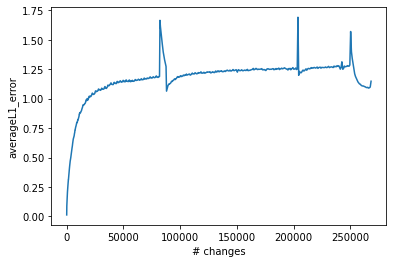

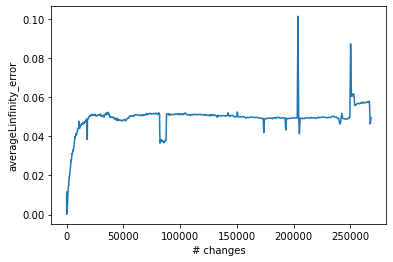

In [6]:
L1_error_graph(L1_metric)
Linfinity_error_graph(Linfinity_metric)

# AS733

['as19971108.txt', 'as19971109.txt', 'as19971110.txt', 'as19971111.txt', 'as19971112.txt', 'as19971113.txt', 'as19971114.txt', 'as19971115.txt', 'as19971116.txt', 'as19971117.txt', 'as19971118.txt', 'as19971119.txt', 'as19971120.txt', 'as19971121.txt', 'as19971122.txt', 'as19971123.txt', 'as19971124.txt', 'as19971125.txt', 'as19971126.txt', 'as19971127.txt', 'as19971128.txt', 'as19971129.txt', 'as19971130.txt', 'as19971201.txt', 'as19971202.txt', 'as19971203.txt', 'as19971204.txt', 'as19971205.txt', 'as19971206.txt', 'as19971207.txt', 'as19971208.txt', 'as19971209.txt', 'as19971210.txt', 'as19971211.txt', 'as19971212.txt', 'as19971213.txt', 'as19971214.txt', 'as19971215.txt', 'as19971216.txt', 'as19971217.txt', 'as19971218.txt', 'as19971219.txt', 'as19971220.txt', 'as19971221.txt', 'as19971222.txt', 'as19971223.txt', 'as19971224.txt', 'as19971225.txt', 'as19971226.txt', 'as19971227.txt', 'as19971228.txt', 'as19971229.txt', 'as19971230.txt', 'as19971231.txt', 'as19980101.txt', 'as199801

['as19971108.txt',
 'as19971109.txt',
 'as19971110.txt',
 'as19971111.txt',
 'as19971112.txt',
 'as19971113.txt',
 'as19971114.txt',
 'as19971115.txt',
 'as19971116.txt',
 'as19971117.txt',
 'as19971118.txt',
 'as19971119.txt',
 'as19971120.txt',
 'as19971121.txt',
 'as19971122.txt',
 'as19971123.txt',
 'as19971124.txt',
 'as19971125.txt',
 'as19971126.txt',
 'as19971127.txt',
 'as19971128.txt',
 'as19971129.txt',
 'as19971130.txt',
 'as19971201.txt',
 'as19971202.txt',
 'as19971203.txt',
 'as19971204.txt',
 'as19971205.txt',
 'as19971206.txt',
 'as19971207.txt',
 'as19971208.txt',
 'as19971209.txt',
 'as19971210.txt',
 'as19971211.txt',
 'as19971212.txt',
 'as19971213.txt',
 'as19971214.txt',
 'as19971215.txt',
 'as19971216.txt',
 'as19971217.txt',
 'as19971218.txt',
 'as19971219.txt',
 'as19971220.txt',
 'as19971221.txt',
 'as19971222.txt',
 'as19971223.txt',
 'as19971224.txt',
 'as19971225.txt',
 'as19971226.txt',
 'as19971227.txt',
 'as19971228.txt',
 'as19971229.txt',
 'as19971230